<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv("google.csv")

#Data Preprocessing 

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,45.7500,47.2500,45.65625,46.50000,31.572819,591800
1,2000-01-03,46.7500,46.9375,44.00000,45.09375,30.618002,3655600
2,2000-01-04,44.7500,45.7500,42.78125,42.81250,29.069048,2533200
3,2000-01-05,42.8125,44.1250,41.59375,43.43750,29.493437,3228000
4,2000-01-06,43.4375,43.8125,41.62500,42.25000,28.687130,2601000


In [6]:
data.shape

(5077, 7)

In [7]:
data.columns[data.isna().any()]

Index([], dtype='object')

No null values <br>
We have 5077 rows and 7 columns 

#1. Find correlation between columns 

In [8]:
corr_matrics = data.corr()

In [9]:
corr_matrics

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999304,0.999166,0.998701,0.980822,-0.298361
High,0.999304,1.000000,0.998653,0.999301,0.978697,-0.289132
Low,0.999166,0.998653,1.000000,0.999262,0.984535,-0.306212
Close,0.998701,0.999301,0.999262,1.000000,0.982123,-0.296948
Adj Close,0.980822,0.978697,0.984535,0.982123,1.000000,-0.295280
Volume,-0.298361,-0.289132,-0.306212,-0.296948,-0.295280,1.000000


In [10]:
corr_matrics.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
px.bar(y = corr_matrics.Volume, x = corr_matrics.columns,
       labels = {
           'x':'Attributes',
           'y':'Volume'
       },
       title = 'Correlation between volume and other columns')

In [12]:
px.imshow(data.corr(), title = "Correlation chart of data")

1. On the bases of analysis, i can say that, all the columns except volume are highly correlated with eachother in positive manner. <br>
2. Volume columns is totally different from other columns and has no correlation.

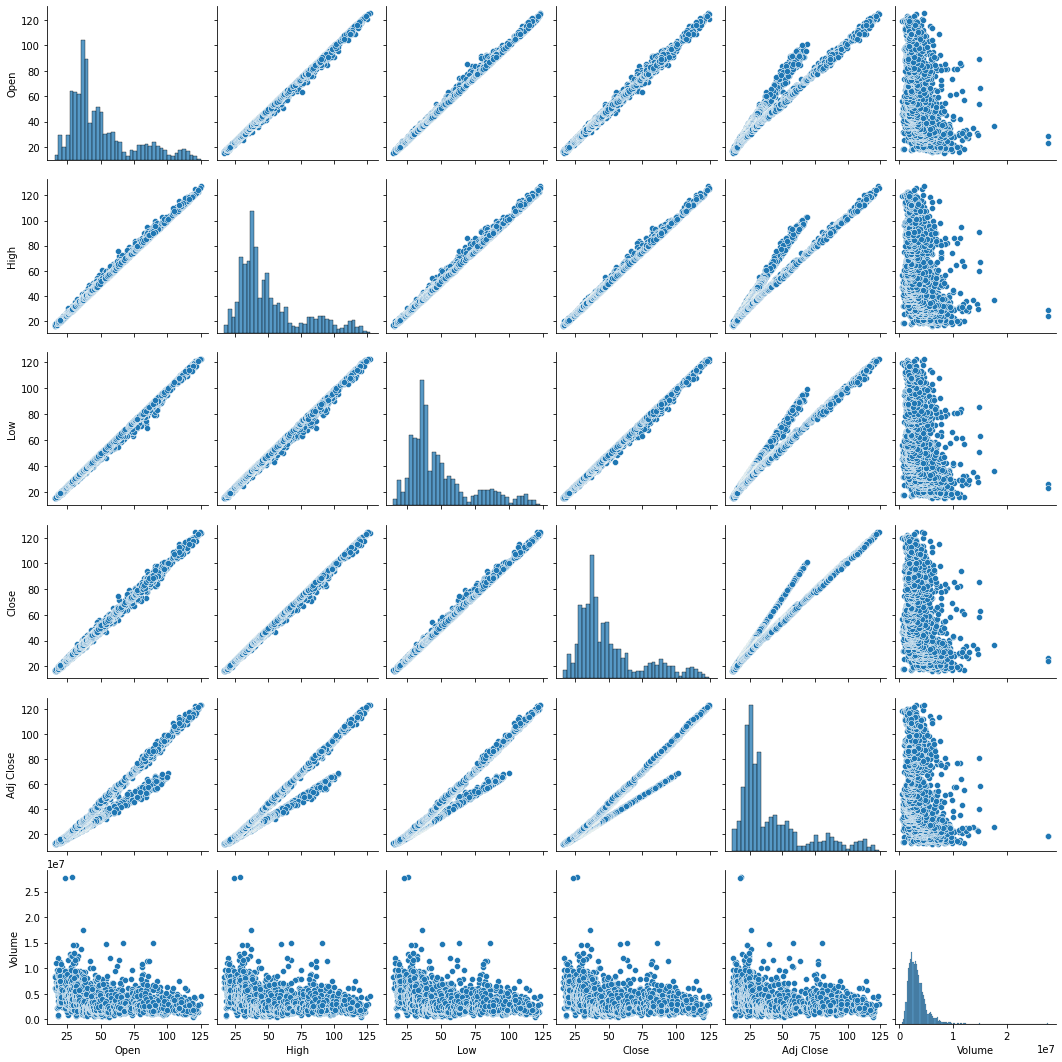

In [13]:
import seaborn as sns 
sns.pairplot(data)

#2. Trends Analysis in Volume 

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

In [15]:
data['Years'] = [y.year for y in data.Date]
data['Months'] = [d.strftime('%b') for d in data.Date]

In [16]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Years,Months
0,1999-12-31,45.7500,47.2500,45.65625,46.50000,31.572819,591800,1999,Dec
1,2000-01-03,46.7500,46.9375,44.00000,45.09375,30.618002,3655600,2000,Jan
2,2000-01-04,44.7500,45.7500,42.78125,42.81250,29.069048,2533200,2000,Jan
3,2000-01-05,42.8125,44.1250,41.59375,43.43750,29.493437,3228000,2000,Jan
4,2000-01-06,43.4375,43.8125,41.62500,42.25000,28.687130,2601000,2000,Jan


In [17]:
px.line(y = data.Volume, x = data.Date,
       labels = {
           'x':'Date',
           'y':'Volume'
       },
       title = 'Trend of Volume over the period of time')

In [18]:
px.histogram(y = data.Volume, x = data.Years,
       labels = {
           'x':'Year',
           'y':'Volume'
       },
       title = 'Volume distribution over the years')

In [19]:
px.histogram(y = data.Volume, x = data.Months,
       labels = {
           'x':'Month',
           'y':'Volume'
       },
       title = 'Volume distribution over the months')

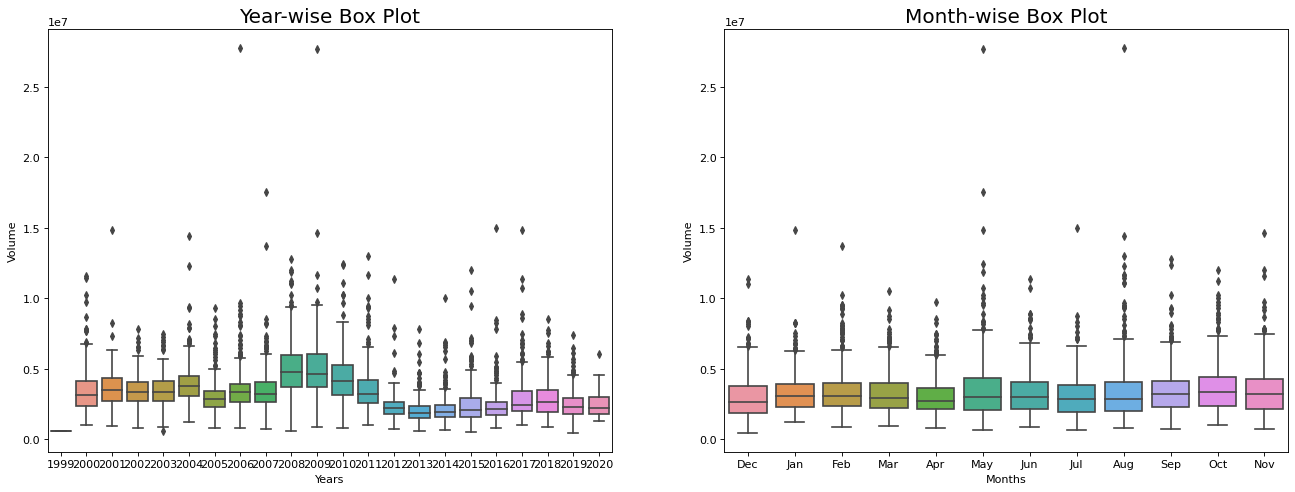

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Years', y='Volume', data=data, ax=axes[0])
sns.boxplot(x='Months', y='Volume', data=data, ax = axes[1])
axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18)
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



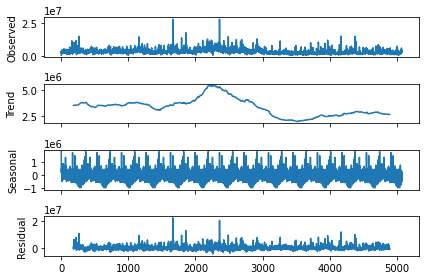

In [25]:
decompose = seasonal_decompose(data.Volume,model='additive',freq=365).plot()

#3. Visualize the outliers.

In [26]:
num_data = data.select_dtypes(include=['float64', 'int64'])
num_data.head()

,Open,High,Low,Close,Adj Close,Volume,Years
0,45.7500,47.2500,45.65625,46.50000,31.572819,591800,1999
1,46.7500,46.9375,44.00000,45.09375,30.618002,3655600,2000
2,44.7500,45.7500,42.78125,42.81250,29.069048,2533200,2000
3,42.8125,44.1250,41.59375,43.43750,29.493437,3228000,2000
4,43.4375,43.8125,41.62500,42.25000,28.687130,2601000,2000


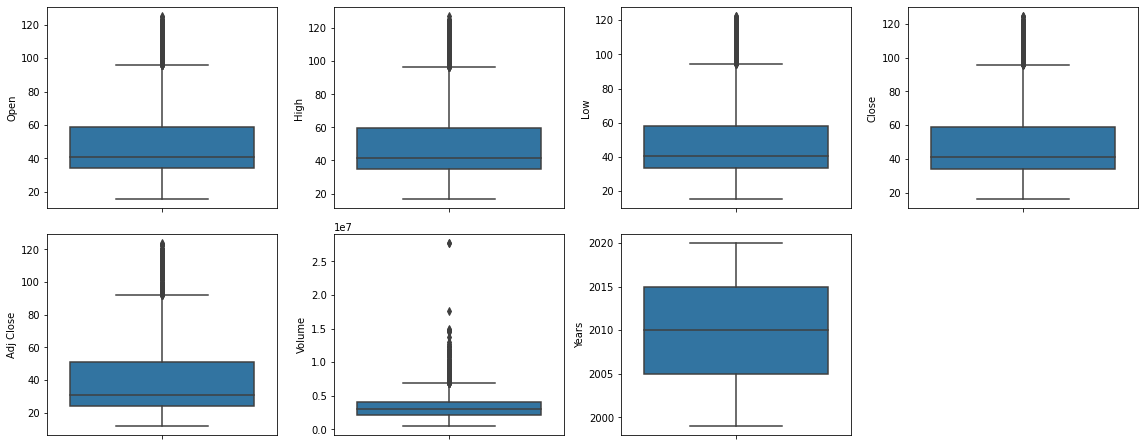

In [27]:
import matplotlib.pyplot as plt
fig3 = plt.figure(figsize=(16,22))
for i in range(len(num_data.columns)):
  fig3.add_subplot(7,4, i+1)
  sns.boxplot(y = num_data[num_data.columns[i]])
plt.tight_layout()
plt.show()

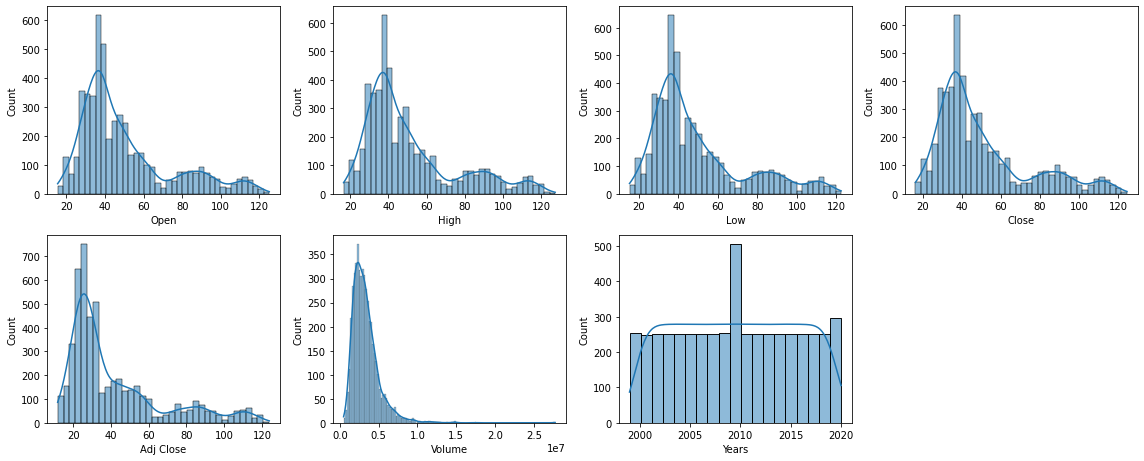

In [28]:
import matplotlib.pyplot as plt
fig3 = plt.figure(figsize=(16,22))
for i in range(len(num_data.columns)):
  fig3.add_subplot(7,4, i+1)
  sns.histplot(x = num_data[num_data.columns[i]],kde = True)
plt.tight_layout()
plt.show()

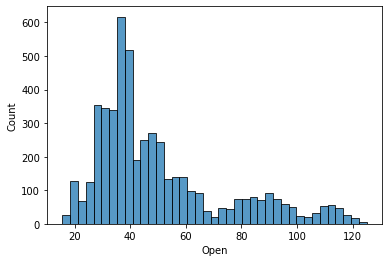

In [29]:
sns.histplot(x = data.Open)

In [30]:
data.Open.std(), data.Open.mean()

(23.773017973659538, 50.21146888378968)

In [31]:
def outlier_std(num_data):
  outlier_list = []
  for i in num_data.columns:
    final_list = []
    sd = np.std(num_data[i].values)
    mean = np.mean(num_data[i].values)
    final_list = [x for x in num_data[i].values if (x < mean - 2 * sd)]
    final_list = [x for x in num_data[i].values if (x > mean + 2 * sd)]
    outlier_list.append(len(final_list))
  return outlier_list
OL_STD = outlier_std(num_data)

In [32]:
print("Outliers based on standard deviation")
for i in range(len(num_data.columns)):
  print(f"{num_data.columns[i]} column has : {OL_STD[i]} outliers")

Outliers based on standard deviation
Open column has : 313 outliers
High column has : 309 outliers
Low column has : 319 outliers
Close column has : 316 outliers
Adj Close column has : 344 outliers
Volume column has : 206 outliers
Years column has : 0 outliers


In [33]:
px.bar(y = OL_STD, x = num_data.columns,color=OL_STD,
       labels = {
           'x':'Attributes',
           'y':'Outliers'
       },
       title = 'Outliers based on standard deviation')

#4. How many times open price surpassed the close price of the stock

In [34]:
def loss_count(data):
  count = 0
  for i in range(data.shape[0]):
    if data.Open[i] > data.Close[i]:
      count = count+1
    
  return count



In [35]:
f"Total {loss_count(data)} times, this stock's open price surpassed the close price of the stock "

"Total 2541 times, this stock's open price surpassed the close price of the stock "

In [36]:
px.line(x = data.Date, y = data.Open)

In [37]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                   open=data['Open'],
                                   high=data['High'],
                                   low=data['Low'],
                                   close=data['Close'])])
fig.show()